In [80]:
import os
import pandas as pd
import seaborn as sns

In [81]:
# Set the base path where the .asc file is located
# base_path = r'C:\Users\qazim\OneDrive - The Ohio State University\Application for Fellowship\.Project\SDCS\Generative AI\Truck Simulink Model\TruckBenchmark_v1.2\Data\2014_KW_T270_cross_country_can_log\candump_kw_drive (1)'
base_path = 'C:/CAN/data/'
file_ = 'C:/CAN/data/2014_KW_T270_cross_country_can_log.txt'
# Construct the full path to the .asc file
# filename = "candump_kw_drive.txt" #"2014_KW_T270_cross_country_can_log.txt" #"CSU090AT.txt"
filename = 'candump_kw_drive.txt'
file_path = os.path.join(base_path, filename)

# Read the CAN log file with the given format
# can test with nrows parameter
data_frames = pd.read_csv(file_path, sep=' ', header=None, usecols=[0, 2], names=['Timestamp', 'ID&Data'])

In [82]:
# Remove parentheses from the timestamp column
data_frames['Timestamp'] = data_frames['Timestamp'].str.strip('()')

# Convert Timestamp column to floating point numbers
data_frames['Timestamp'] = data_frames['Timestamp'].astype(float)

# Adjust the timestamps to start from 0
data_frames['Timestamp'] -= data_frames['Timestamp'].iloc[0]

# Extract CAN_ID and CAN Data
data_frames[['CAN_ID', 'CAN_Data']] = data_frames['ID&Data'].str.split('#', expand=True)

In [83]:
data_frames

,Timestamp,ID&Data,CAN_ID,CAN_Data
0,0.000000,18FEBF0B#80067D7D79777B79,18FEBF0B,80067D7D79777B79
1,0.000584,08FE6E0B#8006800640062006,08FE6E0B,8006800640062006
2,0.005908,0CF00400#718388001500F0FF,0CF00400,718388001500F0FF
3,0.016016,0CF00400#218389001500F0FF,0CF00400,218389001500F0FF
4,0.020155,08FE6E0B#6006200640064006,08FE6E0B,6006200640064006
...,...,...,...,...
137304,411.529544,18FEF200#330000000D0600FF,18FEF200,330000000D0600FF
137305,411.530599,18FEE000#FFFFFFFF55975E00,18FEE000,FFFFFFFF55975E00
137306,411.535547,0CF00400#407D84521400F0FF,0CF00400,407D84521400F0FF
137307,411.542930,18FEE631#700C010020167D7D,18FEE631,700C010020167D7D


In [84]:
# Split the CAN Data into separate bytes
#data_frames[['Data_1', 'Data_2', 'Data_3', 'Data_4', 'Data_5', 'Data_6', 'Data_7', 'Data_8']] = data_frames['CAN_Data'].apply(lambda x: pd.Series(list(x[8:])))
# Split the CAN Data into separate bytes
#TODO : this is the slow part of the code, need to look into why infinite loop
data_frames[['Data_1', 'Data_2', 'Data_3', 'Data_4', 'Data_5', 'Data_6', 'Data_7', 'Data_8']] = data_frames['CAN_Data'].apply(lambda x: pd.Series([x[i:i+2] for i in range(0, len(x), 2)]))

# Drop the original ID&Data and CAN_Data columns
data_frames.drop(['ID&Data', 'CAN_Data'], axis=1, inplace=True)

# Print the DataFrame to see its contents
print(data_frames.head())
#data_frames = data_frames[::1001] #scaling down the resolution by 1000 for faster processing

   Timestamp    CAN_ID Data_1 Data_2 Data_3 Data_4 Data_5 Data_6 Data_7 Data_8
0   0.000000  18FEBF0B     80     06     7D     7D     79     77     7B     79
1   0.000584  08FE6E0B     80     06     80     06     40     06     20     06
2   0.005908  0CF00400     71     83     88     00     15     00     F0     FF
3   0.016016  0CF00400     21     83     89     00     15     00     F0     FF
4   0.020155  08FE6E0B     60     06     20     06     40     06     40     06


In [85]:
data_frames

,Timestamp,CAN_ID,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8
0,0.000000,18FEBF0B,80,06,7D,7D,79,77,7B,79
1,0.000584,08FE6E0B,80,06,80,06,40,06,20,06
2,0.005908,0CF00400,71,83,88,00,15,00,F0,FF
3,0.016016,0CF00400,21,83,89,00,15,00,F0,FF
4,0.020155,08FE6E0B,60,06,20,06,40,06,40,06
...,...,...,...,...,...,...,...,...,...,...
137304,411.529544,18FEF200,33,00,00,00,0D,06,00,FF
137305,411.530599,18FEE000,FF,FF,FF,FF,55,97,5E,00
137306,411.535547,0CF00400,40,7D,84,52,14,00,F0,FF
137307,411.542930,18FEE631,70,0C,01,00,20,16,7D,7D


In [89]:
def hex_to_decimal(x):
    
    return int(x, 16)

def hex_to_decimal(x):
    try:
        return int(x, 16)
    except:
        # this is for NaN values where not all bytes are used
        print(x)
        return 0


In [90]:
can_data = data_frames[['Data_1', 'Data_2', 'Data_3', 'Data_4', 'Data_5', 'Data_6', 'Data_7', 'Data_8']]
can_data_int = can_data.applymap(lambda x: hex_to_decimal(x))

C:\Users\Robert\AppData\Local\Temp\ipykernel_19440\1988944973.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  can_data_int = can_data.applymap(lambda x: hex_to_decimal(x))


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [93]:
can_data_int

,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8
0,128,6,125,125,121,119,123,121
1,128,6,128,6,64,6,32,6
2,113,131,136,0,21,0,240,255
3,33,131,137,0,21,0,240,255
4,96,6,32,6,64,6,64,6
...,...,...,...,...,...,...,...,...
137304,51,0,0,0,13,6,0,255
137305,255,255,255,255,85,151,94,0
137306,64,125,132,82,20,0,240,255
137307,112,12,1,0,32,22,125,125


In [92]:
data_frames[['Timestamp', 'CAN_ID']]

,Timestamp,CAN_ID
0,0.000000,18FEBF0B
1,0.000584,08FE6E0B
2,0.005908,0CF00400
3,0.016016,0CF00400
4,0.020155,08FE6E0B
...,...,...
137304,411.529544,18FEF200
137305,411.530599,18FEE000
137306,411.535547,0CF00400
137307,411.542930,18FEE631


In [96]:
new_df = pd.concat([data_frames[['Timestamp', 'CAN_ID']], can_data_int], axis=1)

In [99]:
new_df.to_csv('data/int_values.csv', index=False)

In [7]:
# Filter data for the specific CAN ID ('18FEF100x')
specific_id_data = data_frames[data_frames['CAN_ID'] == '18FEF100']
specific_id_data

,Timestamp,CAN_ID,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8
9,0.037055,18FEF100,F3,50,06,40,00,00,1F,FF
43,0.138173,18FEF100,F3,56,06,40,00,00,1F,FF
74,0.237054,18FEF100,F3,4C,06,40,00,00,1F,FF
105,0.337051,18FEF100,F3,48,06,40,00,00,1F,FF
138,0.439329,18FEF100,F3,46,06,40,00,00,1F,FF
...,...,...,...,...,...,...,...,...,...,...
137167,411.126615,18FEF100,F7,00,00,44,00,00,1F,FF
137198,411.227556,18FEF100,F7,00,00,44,00,00,1F,FF
137230,411.326905,18FEF100,F7,00,00,44,00,00,1F,FF
137261,411.427859,18FEF100,F7,00,00,44,00,00,1F,FF


In [52]:
can_data = specific_id_data[['Data_1', 'Data_2', 'Data_3', 'Data_4', 'Data_5', 'Data_6', 'Data_7', 'Data_8']]

In [53]:
can_data.isnull().values.any()

False

In [54]:
can_data.tail()

,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8
137167,F7,00,00,44,00,00,1F,FF
137198,F7,00,00,44,00,00,1F,FF
137230,F7,00,00,44,00,00,1F,FF
137261,F7,00,00,44,00,00,1F,FF
137301,F7,00,00,44,00,00,1F,FF


In [55]:
nandf = can_data[can_data.isnull().any(axis=1)]

In [56]:
nandf

,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8


In [57]:
def hex_to_decimal(x):
    try:
        return int(x, 16)
    except:
        # this is for NaN values where not all bytes are used
        print(x)
        return 0


In [58]:
can_data_int = can_data.applymap(lambda x: hex_to_decimal(x))

C:\Users\Robert\AppData\Local\Temp\ipykernel_19440\477262099.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  can_data_int = can_data.applymap(lambda x: hex_to_decimal(x))


In [59]:
can_data_int

,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8
9,243,80,6,64,0,0,31,255
43,243,86,6,64,0,0,31,255
74,243,76,6,64,0,0,31,255
105,243,72,6,64,0,0,31,255
138,243,70,6,64,0,0,31,255
...,...,...,...,...,...,...,...,...
137167,247,0,0,68,0,0,31,255
137198,247,0,0,68,0,0,31,255
137230,247,0,0,68,0,0,31,255
137261,247,0,0,68,0,0,31,255


<Axes: xlabel='Timestamp', ylabel='Data_3'>

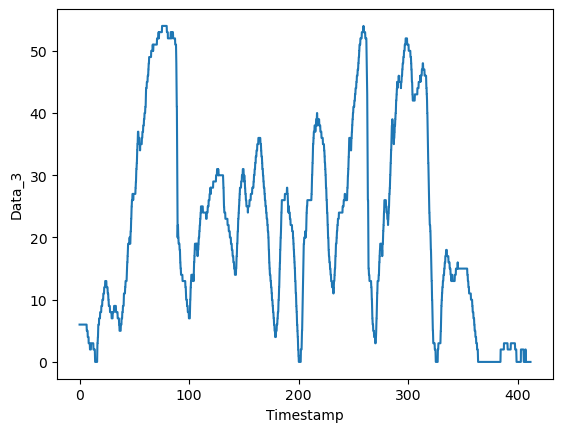

In [60]:
sns.lineplot(data=can_data_int, x = specific_id_data['Timestamp'], y='Data_3')

In [61]:
can_ids = specific_id_data[['Timestamp' ,'CAN_ID']]

In [62]:
final_df = pd.concat([can_ids, can_data_int], axis = 1)

In [64]:
final_df.to_csv('18FEF100_signal.csv')

In [77]:
signal_3 = final_df['Timestamp']

In [78]:
signal_3_np = signal_3.to_numpy()

In [79]:
import numpy as np
np.savetxt('timestamp_3.txt', signal_3_np)

In [76]:
signal_3_np.max()
signal_3_np.min()

0

In [6]:
# Print the keys (field names) of the DataFrames
print("Field Names (Keys) of DataFrames:")
print(data_frames.keys())

Field Names (Keys) of DataFrames:
Index(['Timestamp', 'CAN_ID', 'Data_1', 'Data_2', 'Data_3', 'Data_4', 'Data_5',
       'Data_6', 'Data_7', 'Data_8'],
      dtype='object')


In [4]:
CAN_ID = data_frames['CAN_ID']
CAN_Timestamp = data_frames['Timestamp']
CAN_Data = pd.concat([data_frames[col] for col in data_frames.keys() if col.startswith('Data_')], axis=1)

In [5]:
print(CAN_ID.head())
print("\n" + "="*50 + "\n")  # Add a separator for better visibility
print(CAN_Timestamp.head())
print("\n" + "="*50 + "\n")  # Add a separator for better visibility
print(CAN_Data.head())
print("\n" + "="*50 + "\n")  # Add a separator for better visibility

0    18FEBF0B
1    08FE6E0B
2    0CF00400
3    0CF00400
4    08FE6E0B
Name: CAN_ID, dtype: object


0    0.000000
1    0.000584
2    0.005908
3    0.016016
4    0.020155
Name: Timestamp, dtype: float64


  Data_1 Data_2 Data_3 Data_4 Data_5 Data_6 Data_7 Data_8
0     80     06     7D     7D     79     77     7B     79
1     80     06     80     06     40     06     20     06
2     71     83     88     00     15     00     F0     FF
3     21     83     89     00     15     00     F0     FF
4     60     06     20     06     40     06     40     06




In [6]:
# Get unique values from the 'CAN_ID' column
unique_samples = CAN_ID.unique()

# Print unique samples
print(f"Unique samples: {unique_samples}")
print(len(unique_samples))

Unique samples: ['18FEBF0B' '08FE6E0B' '0CF00400' '0CF00300' '18F00131' '18FEF100'
 '18FEF131' '18F0000F' '18FEF031' '18FEF200' '18FEF231' '0CF00331'
 '18FEE000' '18EAFF31' '18FEED00' '18F0010B' '18FECA31' '18FEDF00'
 '18FDA155' '18FE5600' '18FEEE00' '18FEF600' '0CFEDD00' '18FEEF00'
 '18FEF500' '18FEC100' '18FEBD00' '18FEE400' '18FEF700' '18FD7C00'
 '18FEFF00' '18EA3100' '1CECFF0F' '1CEBFF0F' '18FEE631' '18FEE500'
 '18E0FF31' '18FEFC31' '18FEAE31' '18FEF731' '18FEFA31' '18FEF831'
 '18FEC131' '1CECFF00' '1CEBFF00' '18FEE900' '1CFEB300' '18FEE700'
 '18EAFF0B' '0C00000B' '0C00100B' '0C01030B' '0C00290B' '0C00030B'
 '0C000F0B']
55


In [7]:
# Filter data for the specific CAN ID ('18FEF100x')
specific_id_data = data_frames[data_frames['CAN_ID'] == '18FEF100']#18FEC100, 18FEA600, 18FB2D00, 18F02100, 18F00503, CF00A00, 18FEF100

# Extract Timestamp and CAN Data for the specific ID
specific_id_timestamp = specific_id_data['Timestamp']
specific_id_can_data = pd.concat([specific_id_data[col] for col in data_frames.keys() if col.startswith('Data_')], axis=1)
#specific_id_can_data = specific_id_data['Data_1']

In [8]:
print(specific_id_data.head())
print("\n" + "="*50 + "\n")  # Add a separator for better visibility
print(specific_id_timestamp.head())
print("\n" + "="*50 + "\n")  # Add a separator for better visibility
print(specific_id_can_data.head())
print("\n" + "="*50 + "\n")  # Add a separator for better visibility

     Timestamp    CAN_ID Data_1 Data_2 Data_3 Data_4 Data_5 Data_6 Data_7  \
9     0.037055  18FEF100     F3     50     06     40     00     00     1F   
43    0.138173  18FEF100     F3     56     06     40     00     00     1F   
74    0.237054  18FEF100     F3     4C     06     40     00     00     1F   
105   0.337051  18FEF100     F3     48     06     40     00     00     1F   
138   0.439329  18FEF100     F3     46     06     40     00     00     1F   

    Data_8  
9       FF  
43      FF  
74      FF  
105     FF  
138     FF  


9      0.037055
43     0.138173
74     0.237054
105    0.337051
138    0.439329
Name: Timestamp, dtype: float64


    Data_1 Data_2 Data_3 Data_4 Data_5 Data_6 Data_7 Data_8
9       F3     50     06     40     00     00     1F     FF
43      F3     56     06     40     00     00     1F     FF
74      F3     4C     06     40     00     00     1F     FF
105     F3     48     06     40     00     00     1F     FF
138     F3     46     06     40     00     

In [9]:
import matplotlib.pyplot as plt

# Convert specific_id_timestamp to a list
# Convert hexadecimal strings to integers in specific_id_can_data
specific_id_can_data_int = specific_id_can_data.apply(lambda x: x.apply(lambda y: int(y, 16)))

specific_id_timestamp_list = specific_id_timestamp.tolist()
# Set the size of the figure
plt.figure(figsize=(12, 30))  # Adjust the size as needed
# Get the number of columns in specific_id_can_data
num_cols = len(specific_id_can_data_int.columns)
# Plot each column of specific_id_can_data against specific_id_timestamp
# Create subplots for each column
for i, col in enumerate(specific_id_can_data_int.columns, 1):
    plt.subplot(num_cols, 1, i)
    plt.plot(specific_id_timestamp, specific_id_can_data_int[col], label=col)
    plt.xlabel('Time')
    plt.ylabel('CAN Data')
    plt.title(f'CAN Data Over Time for CAN ID: 18FEF100x ({col})')
    plt.grid(True)  # Add grid to the subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

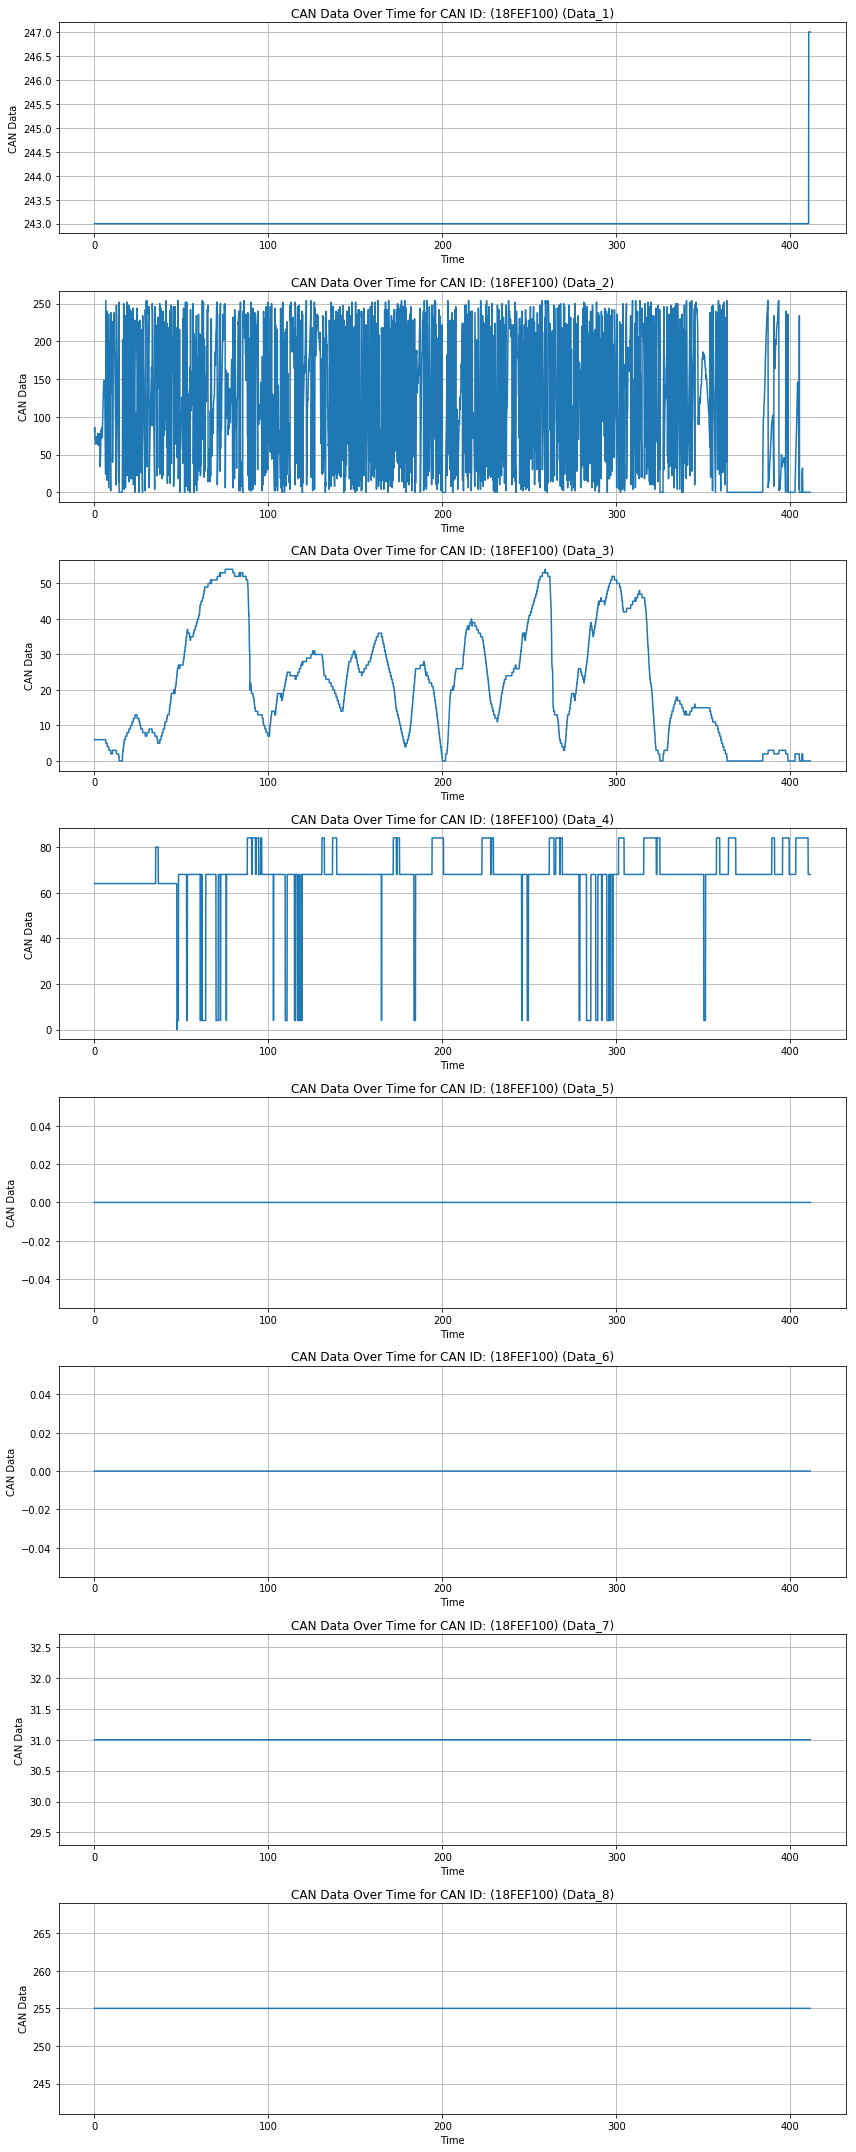

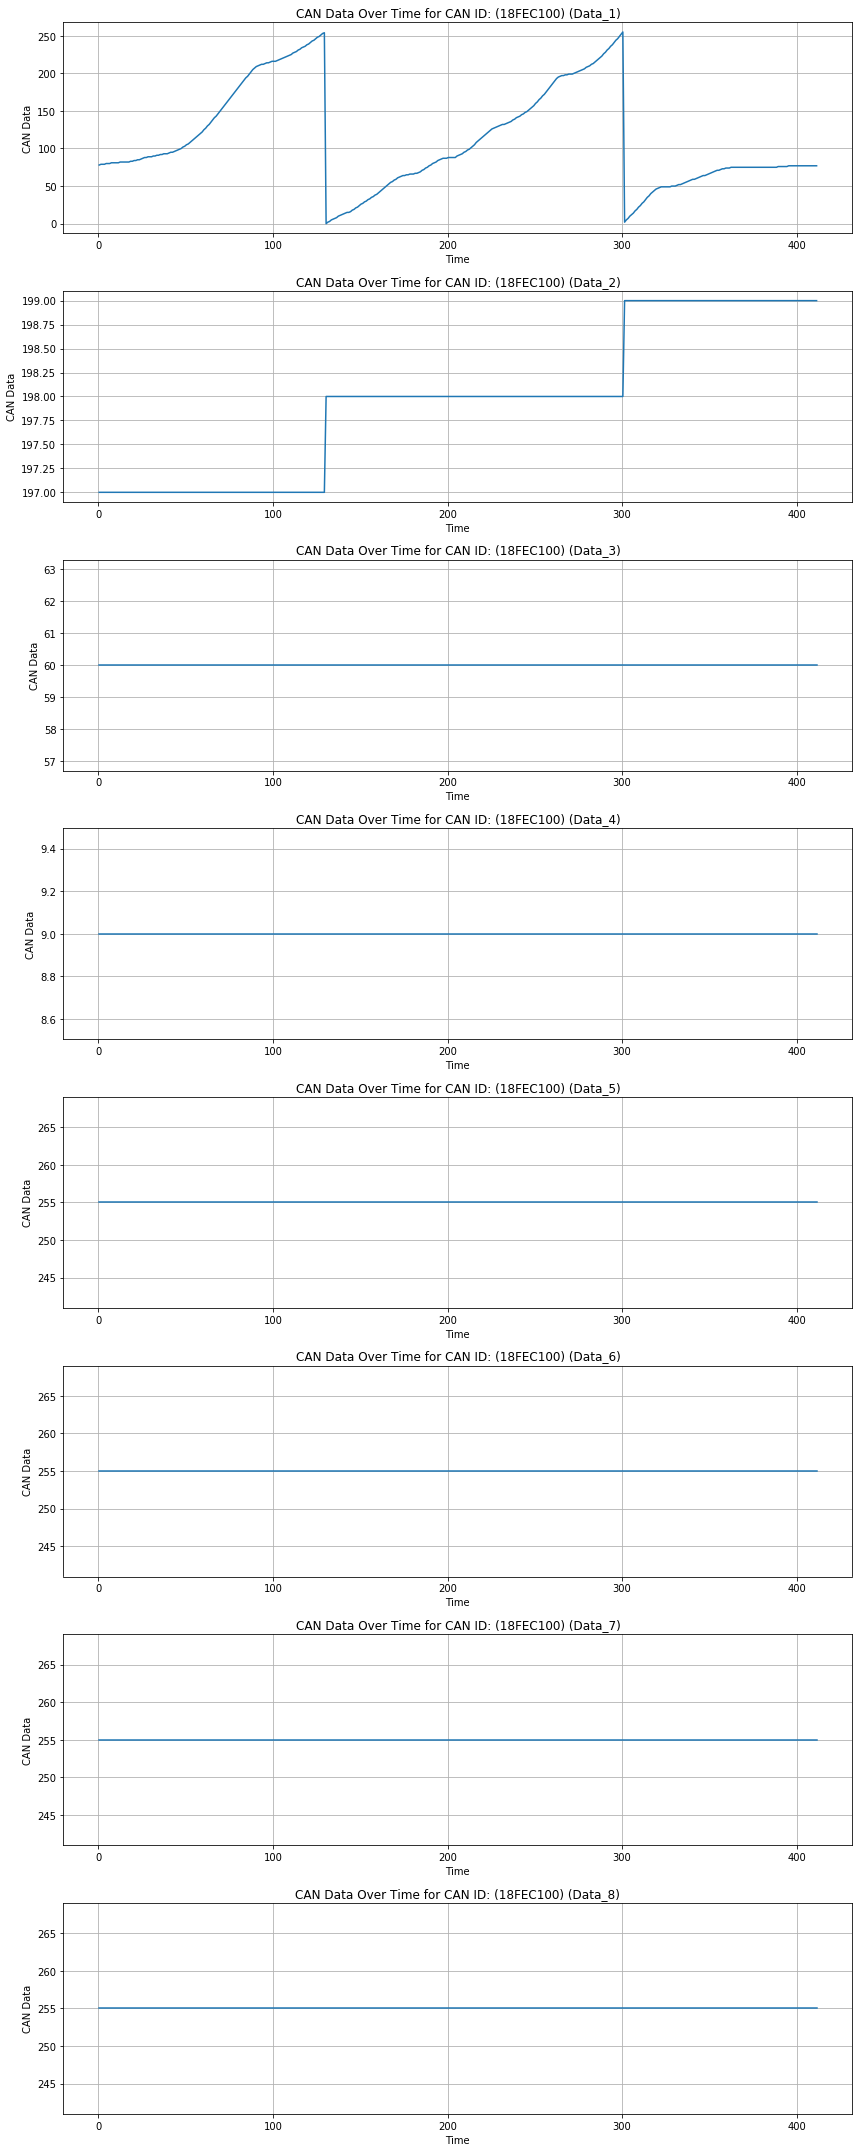

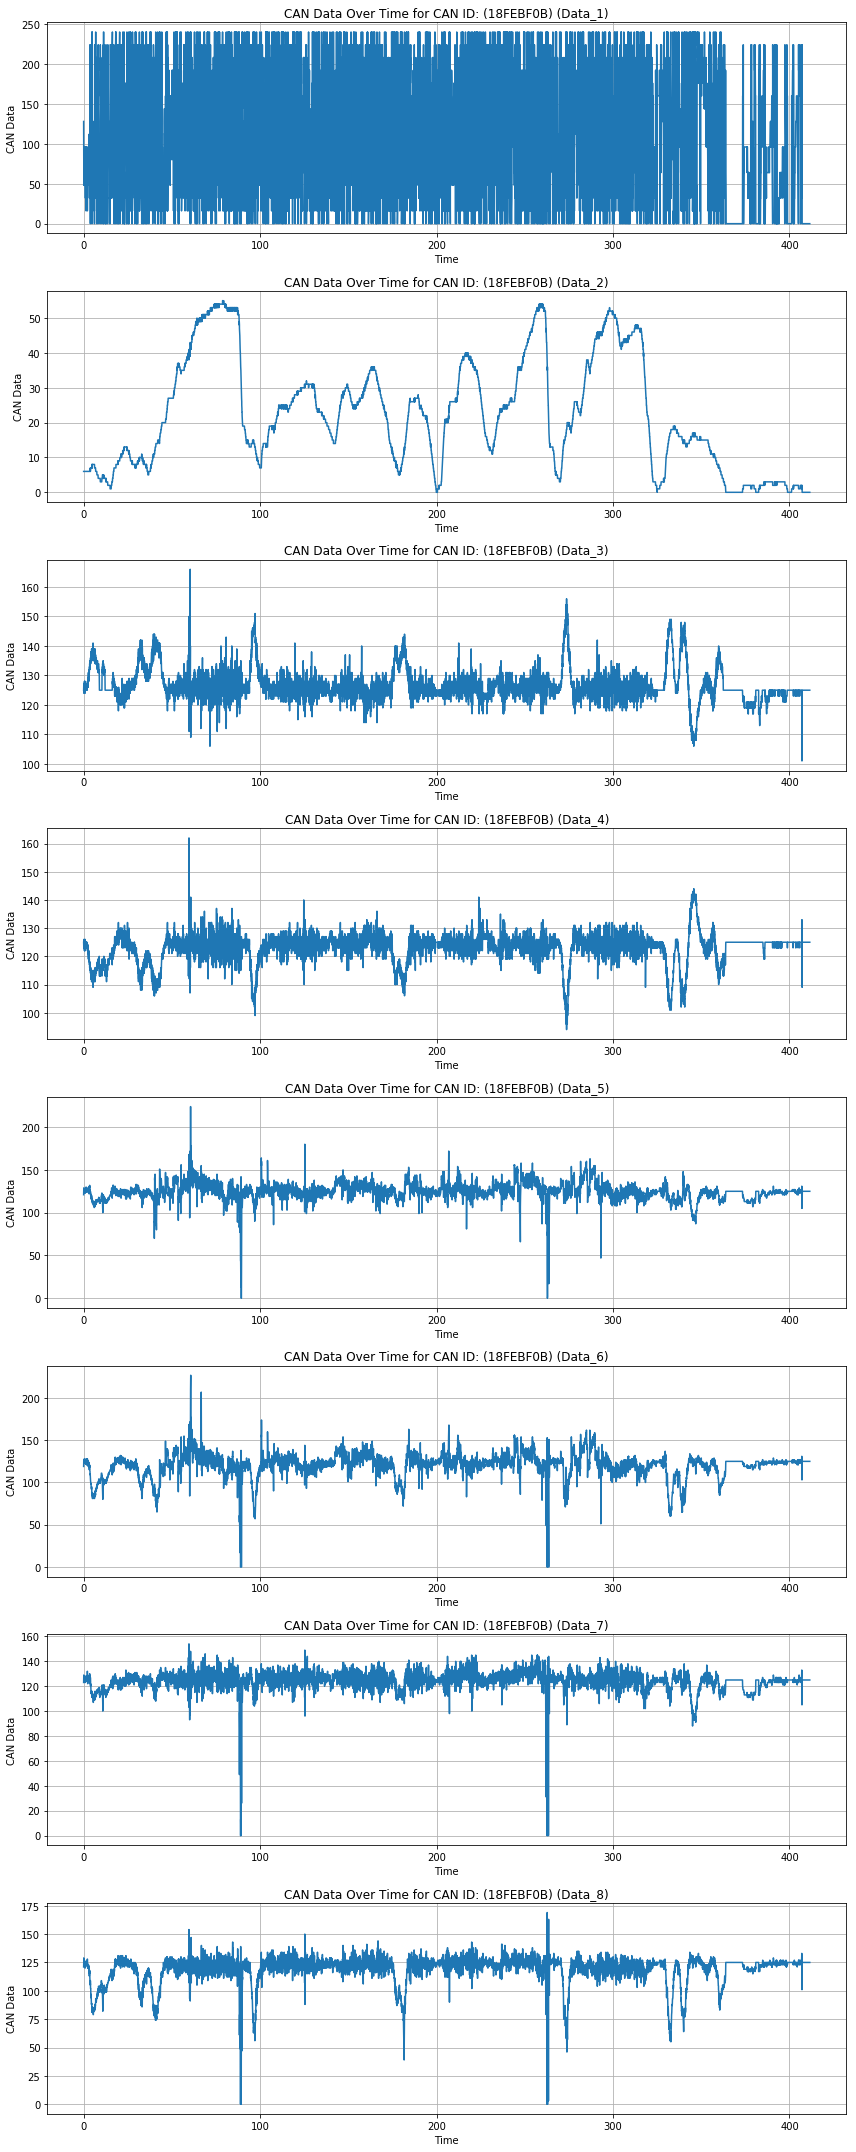

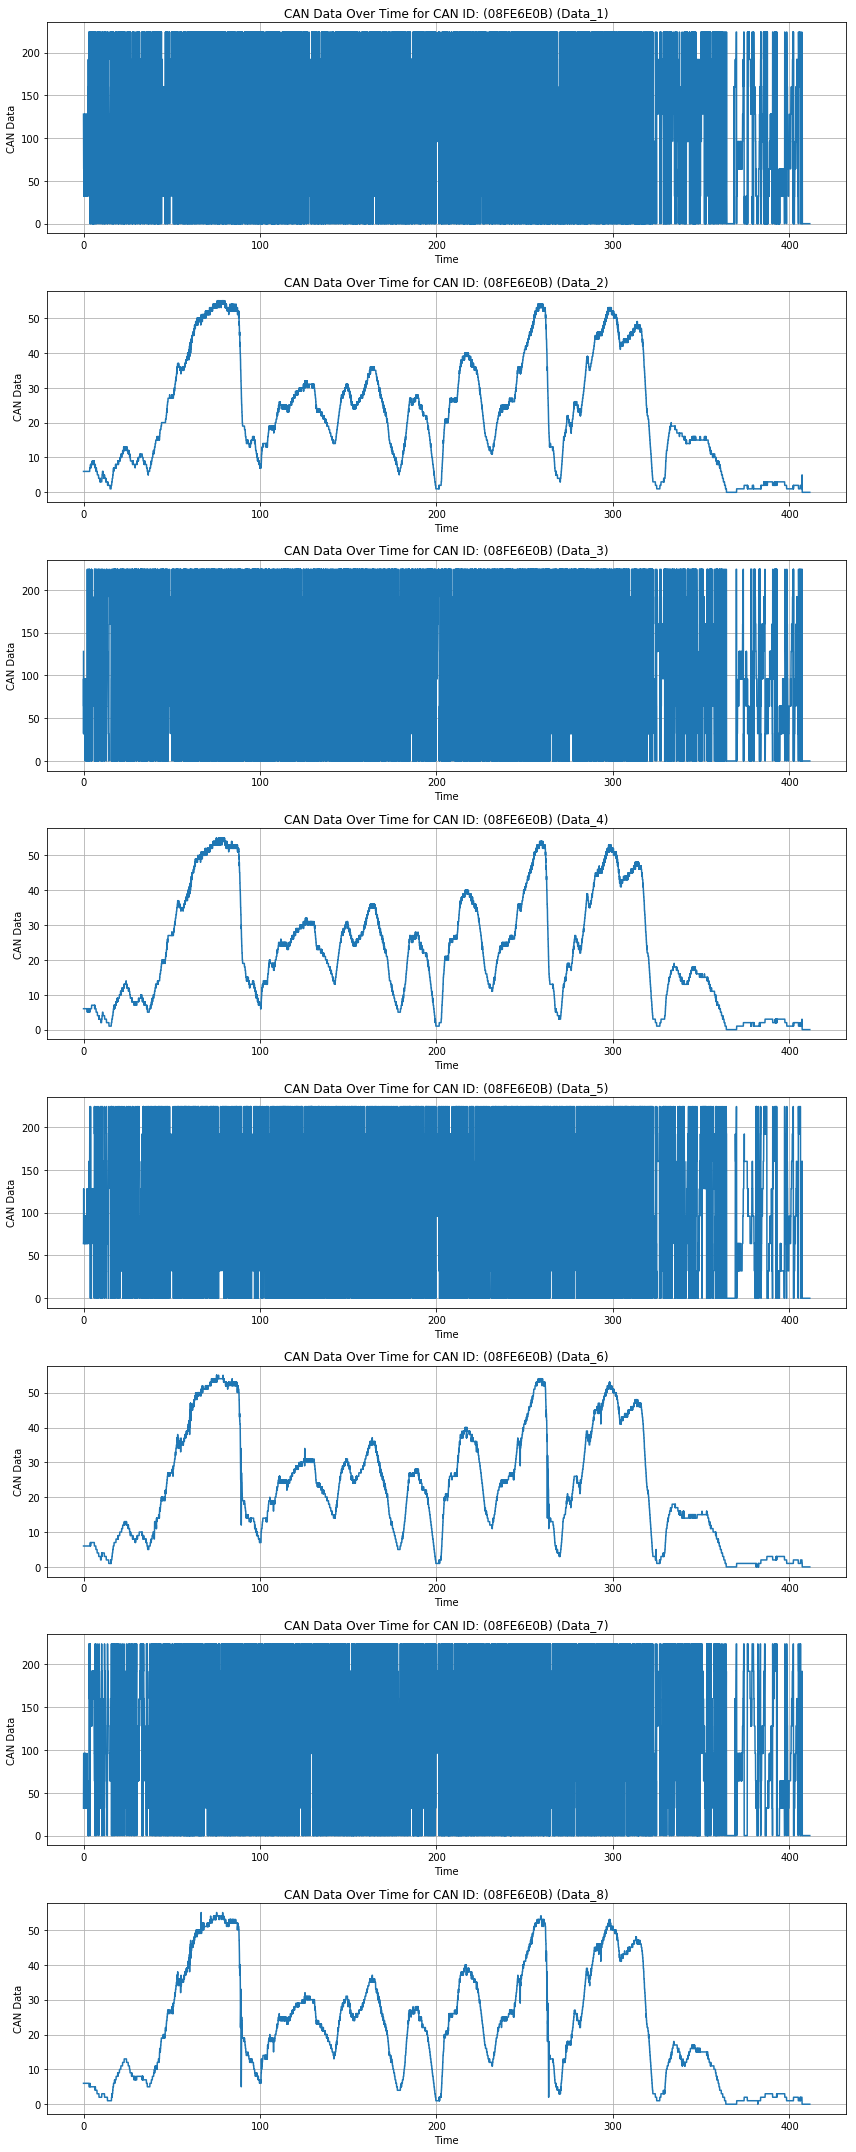

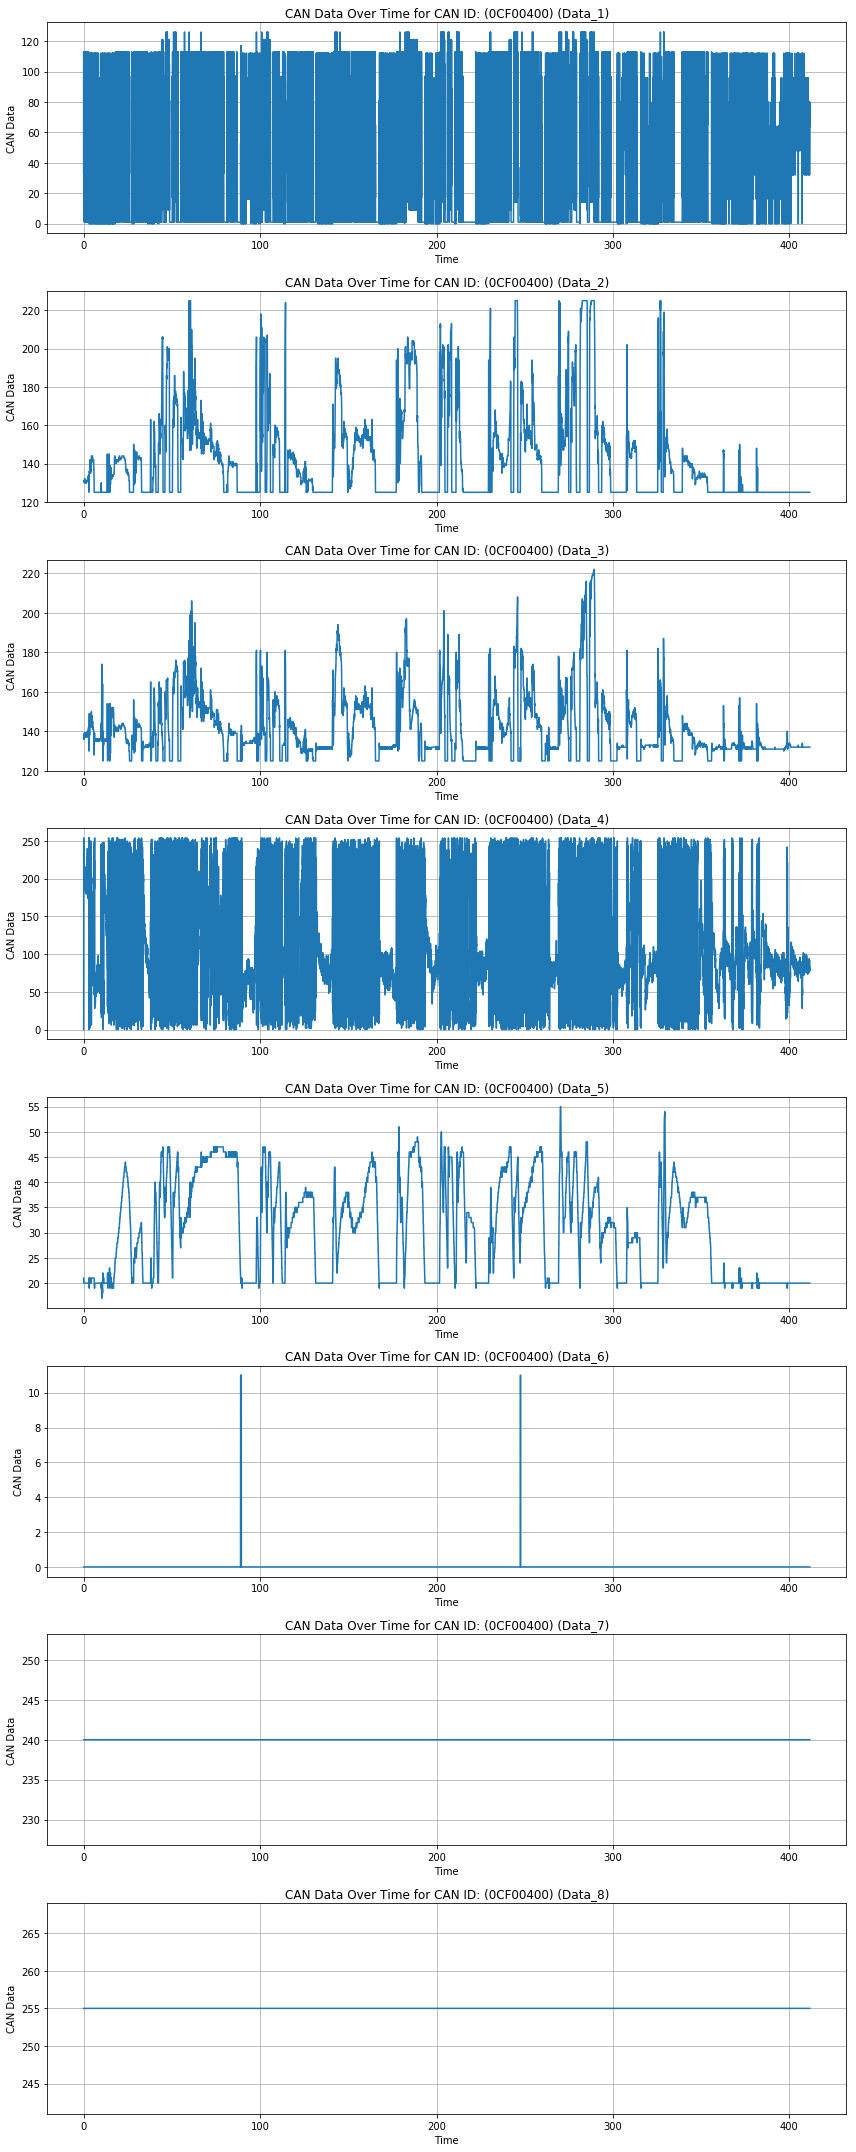

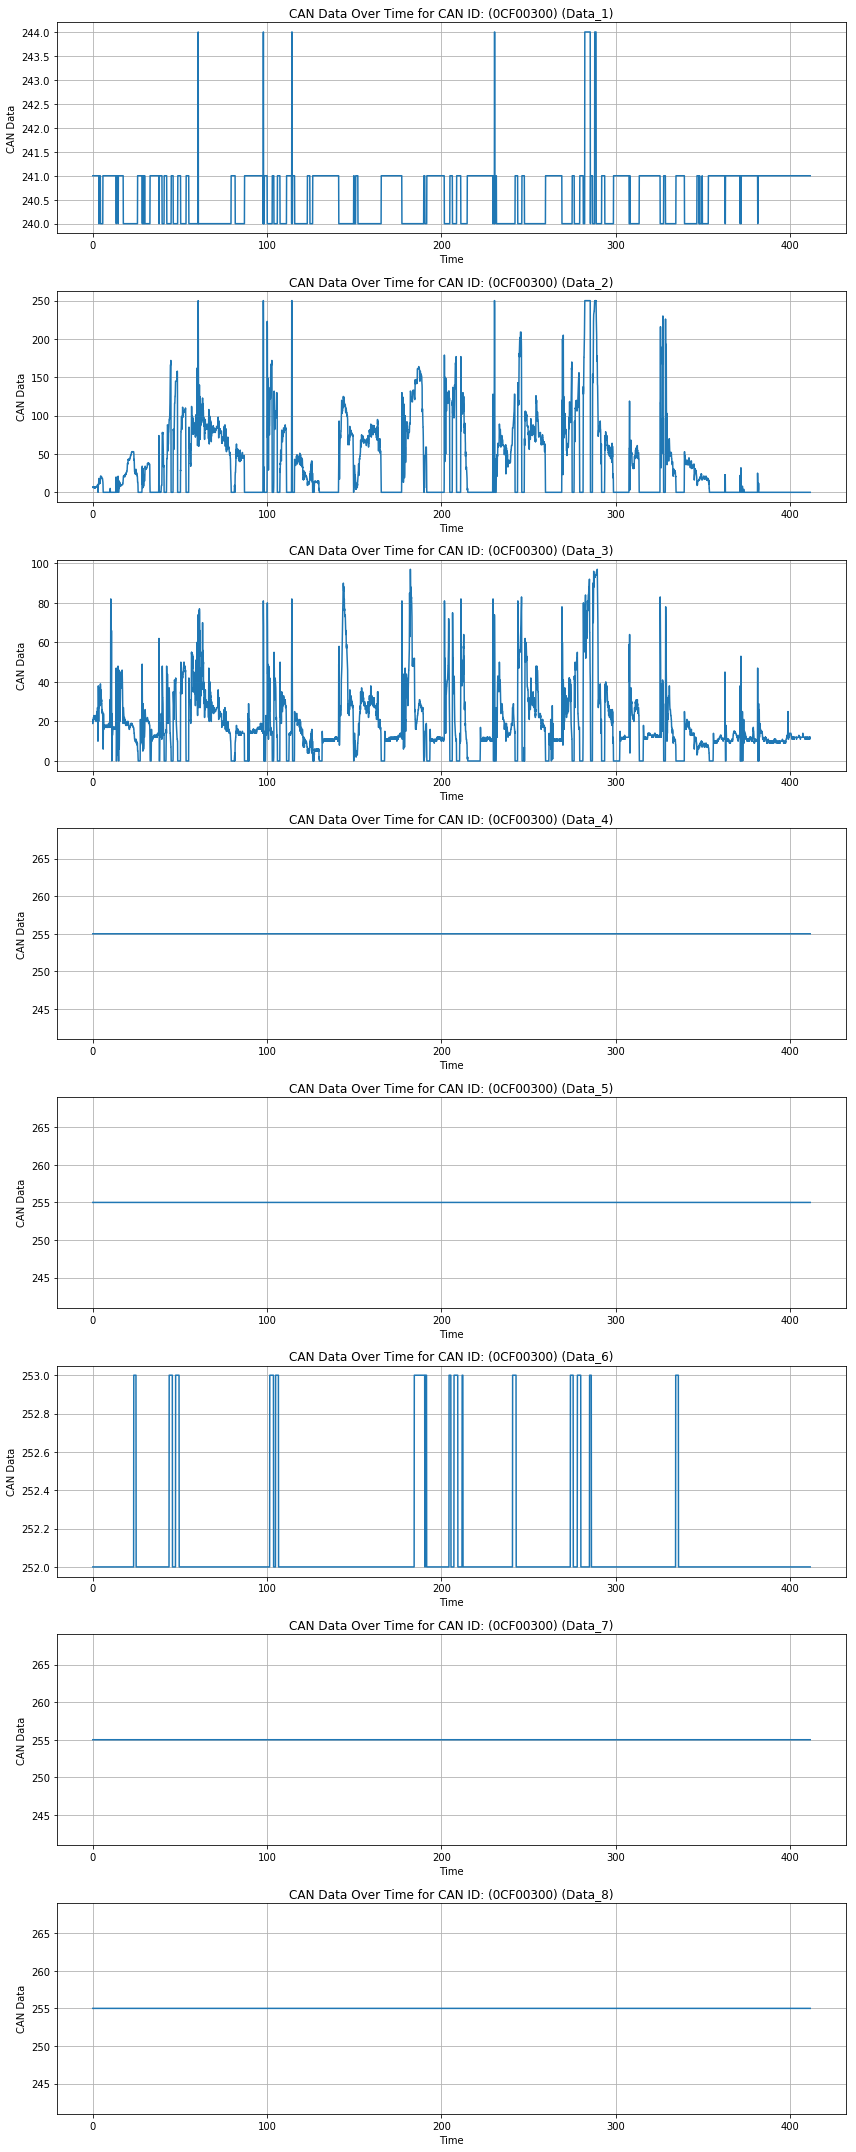

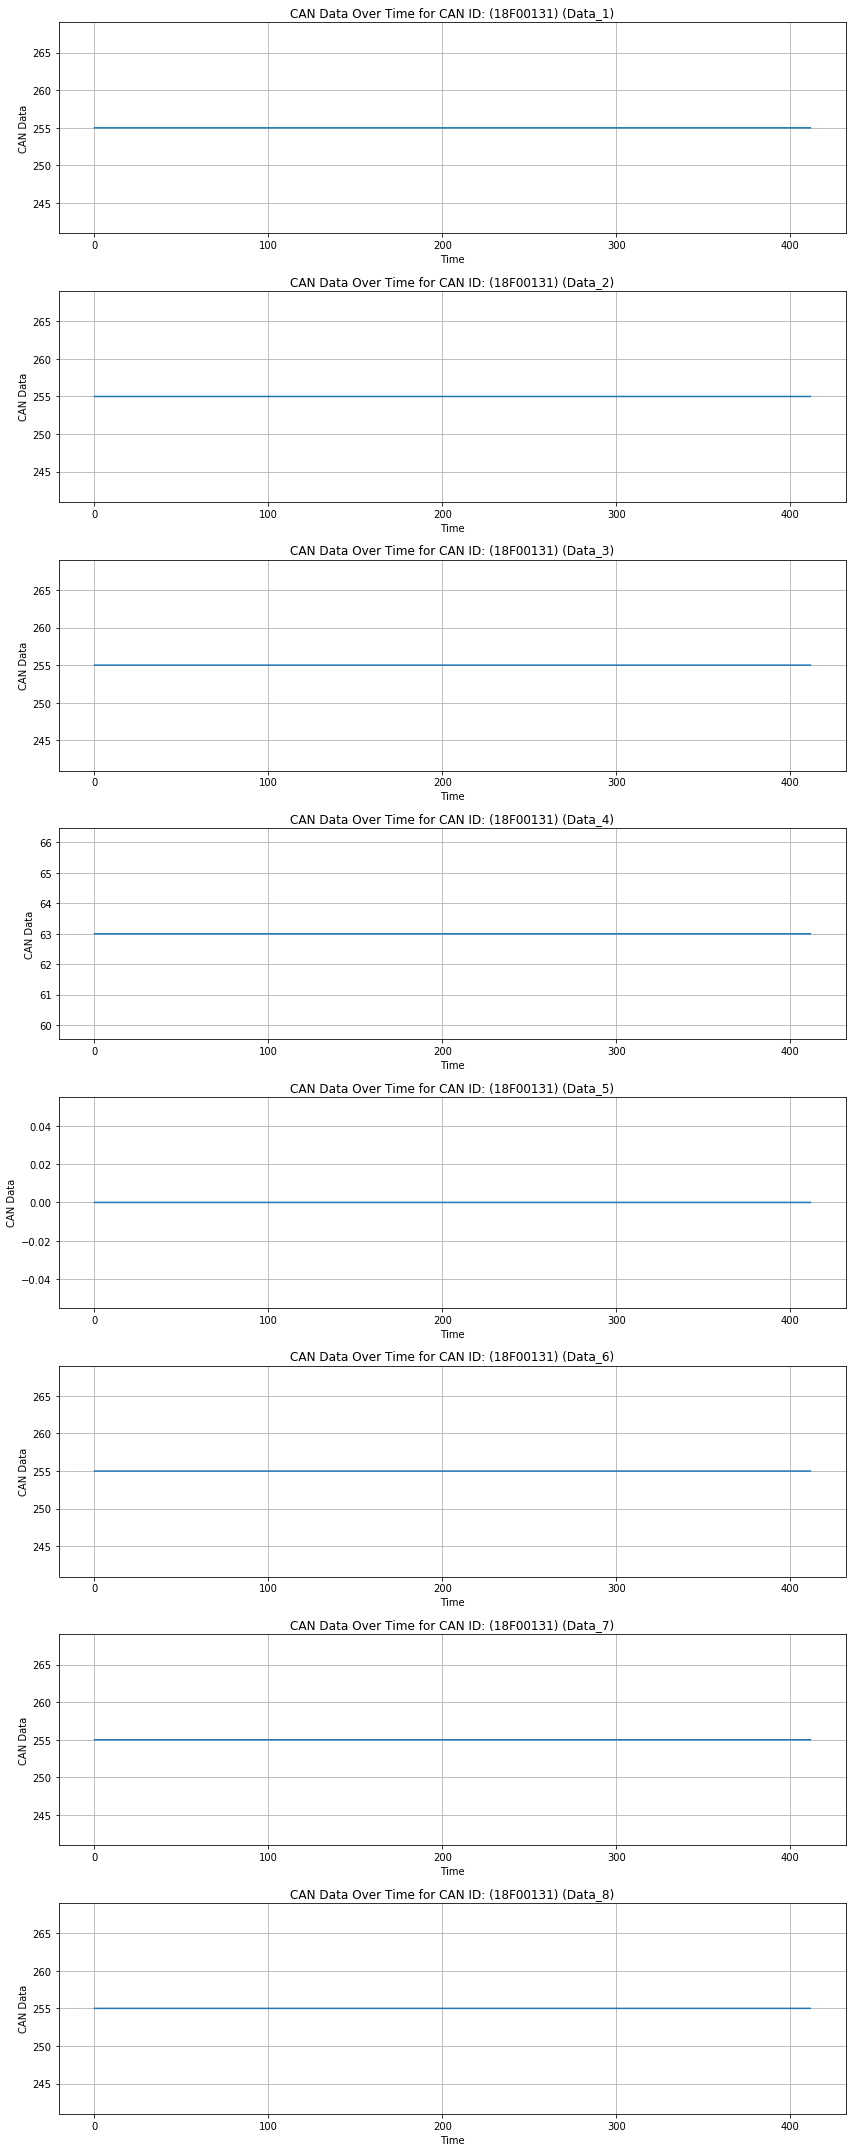

"\n    # Plot each column of specific_id_can_data against specific_id_timestamp\n    for col in specific_id_can_data_int.columns:\n        plt.plot(specific_id_timestamp, specific_id_can_data_int[col], label=col)\n\n    # Add labels and title\n    plt.xlabel('Time')\n    plt.ylabel('CAN Data')\n    plt.title(f'CAN Data Over Time for CAN ID: {can_id}')\n    plt.legend()\n    plt.grid(True)  # Add grid to the plot\n    plt.show()  # Show the plot for each CAN ID\n"

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# List of CAN IDs to loop over
can_ids = ['18FEF100', '18FEC100', '18FEBF0B', '08FE6E0B', '0CF00400', '0CF00300', '18F00131'] #,  '18F00503', 'CF00A00'] #N/A in the CAN log '18FEA600x', '18FB2D00x', '18F02100x',
#'18FEBF0B' '08FE6E0B' '0CF00400' '0CF00300' '18F00131'
# Loop over each CAN ID
for can_id in can_ids:
    # Filter data for the specific CAN ID
    specific_id_data = data_frames[data_frames['CAN_ID'] == can_id]
    

    # Extract Timestamp and CAN Data for the specific ID
    specific_id_timestamp = specific_id_data['Timestamp']
    specific_id_can_data = pd.concat([specific_id_data[col] for col in data_frames.columns if col.startswith('Data_')], axis=1)

    # Convert hexadecimal strings to integers
    specific_id_can_data_int = specific_id_can_data.applymap(lambda x: int(x, 16))

    # Plot for each CAN ID
    plt.figure(figsize=(12, 30))  # Adjust the size as needed
    # Create subplots for each column
    for i, col in enumerate(specific_id_can_data_int.columns, 1):
        plt.subplot(num_cols, 1, i)
        plt.plot(specific_id_timestamp, specific_id_can_data_int[col], label=col)
        plt.xlabel('Time')
        plt.ylabel('CAN Data')
        plt.title(f'CAN Data Over Time for CAN ID: ({can_id}) ({col})')
        plt.grid(True)  # Add grid to the subplot

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
'''
    # Plot each column of specific_id_can_data against specific_id_timestamp
    for col in specific_id_can_data_int.columns:
        plt.plot(specific_id_timestamp, specific_id_can_data_int[col], label=col)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('CAN Data')
    plt.title(f'CAN Data Over Time for CAN ID: {can_id}')
    plt.legend()
    plt.grid(True)  # Add grid to the plot
    plt.show()  # Show the plot for each CAN ID
'''

In [11]:
specific_id_data = data_frames[data_frames['CAN_ID'] == '18FEF100x']
can_id_sensor1 =  specific_id_data['CAN_ID']
can_data_sensor1 = specific_id_data['Data_3']
can_data_sensor1 = can_data_sensor1.apply(lambda x: int(x, 16))
timestamp_sensor1 = specific_id_data['Timestamp']

specific_id_data = data_frames[data_frames['CAN_ID'] == 'CF00A00x']
can_id_sensor2 = specific_id_data['CAN_ID']
can_data_sensor2 = specific_id_data['Data_4']
can_data_sensor2 = can_data_sensor2.apply(lambda x: int(x, 16))
timestamp_sensor2 = specific_id_data['Timestamp']

In [12]:
print((can_data_sensor1.shape))
print((can_data_sensor2.shape))
print((timestamp_sensor1.shape))
print((timestamp_sensor2.shape))

(0,)
(0,)
(0,)
(0,)


In [13]:
#This routine helps in upsampling the generated data to match the original data
import numpy as np
from scipy.interpolate import interp1d

def upsample_data(desired_upsample_length, sample_to_be_up, desired_time_length):
    # Determine the length difference
    len_diff = desired_upsample_length - desired_time_length

    # Calculate the interpolation factor
    interp_factor = desired_time_length / desired_upsample_length

    # Generate new time points for flattened_sample_gx
    new_time_gx = np.arange(0, desired_time_length)

    # Generate new time points for data_orig['Speed']
    new_time_orig = np.linspace(0, desired_time_length-1, desired_upsample_length)

    # Interpolate flattened_sample_gx to match the length of data_orig['Speed']
    interpolated_sample_gx = interp1d(new_time_gx, sample_to_be_up[:desired_time_length], kind='linear')(new_time_orig)

    return interpolated_sample_gx, new_time_orig

In [14]:
interpolated_can_data_sensor1, new_time_can_data_sensor1= upsample_data((len(can_data_sensor1)*10), can_data_sensor1, len(timestamp_sensor1))
interpolated_can_data_sensor2, new_time_can_data_sensor2 = upsample_data((len(can_data_sensor2)*10), can_data_sensor2, len(timestamp_sensor2))
#interpolated_moving_avg, new_time_moving_avg = upsample_data(data_orig['Speed'], moving_avg, 400)

ZeroDivisionError: division by zero

In [ ]:
print(len(can_data_sensor1))

In [ ]:
print(len(interpolated_can_data_sensor1), max(new_time_can_data_sensor1))
print(len(interpolated_can_data_sensor2), max(new_time_can_data_sensor2))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import logging
#tf.get_logger().setLevel(logging.ERROR)

In [ ]:
def MinMaxScaler(data):
    """Min-Max Normalizer.
    
    Args:
      - data: raw data
      
    Returns:
      - norm_data: normalized data
      - min_val: minimum values (for renormalization)
      - max_val: maximum values (for renormalization)
    """    
    min_val = np.min(np.min(data, axis = 0), axis = 0)
    data = data - min_val
      
    max_val = np.max(np.max(data, axis = 0), axis = 0)
    norm_data = data / (max_val + 1e-7)
      
    return norm_data, min_val, max_val

In [ ]:
# Define sequence length
sequence_length = 30  # You can change this as needed

# Extract the "Timestamp" column
time_data1 = new_time_can_data_sensor1
# Extract the "Timestamp" column
time_data2 = new_time_can_data_sensor2

# Extract the "data_sensor1" column
sensor1_data = interpolated_can_data_sensor1
# Extract the "data_sensor2" column
sensor2_data = interpolated_can_data_sensor2


# Normalization
#ori_data, min_val, max_val = MinMaxScaler(ori_data)
sensor1_data, min_val1, max_val1 = MinMaxScaler(sensor1_data)
#ori_data, min_val, max_val = MinMaxScaler(ori_data)
sensor2_data, min_val2, max_val2 = MinMaxScaler(sensor2_data)

#samples_sensor = [len(sensor1_data), len(sensor2_data)]
samples_sensor = sum([len(sensor1_data), len(sensor2_data)])  # Total number of sequences

# Function to create sequences from sensor data
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return sequences

# Function to generate sensor labels
def make_sensor_label(target, samples_sensor):
    return np.full(samples_sensor, target)


# Initialize sensor_data and sensor_labels lists
sensor_data = []
sensor_labels = []

# Create sequences for sensor1_data and sensor2_data
for target, sensor_data_single in enumerate([sensor1_data, sensor2_data], start=0):
    sequences = create_sequences(sensor_data_single, sequence_length)
    sensor_data.extend(sequences)
    
    # Generate sensor labels for each sequence
    sensor_labels.extend(make_sensor_label(target, len(sequences)))

print(len(sensor_data))
print((samples_sensor))

In [ ]:
# Convert sensor_data and sensor_labels to numpy arrays
#sensor_data = np.array(sensor_data)
sensor_data = np.array(sensor_data).reshape(len(sensor_data), sequence_length, 1)
sensor_labels = np.array(sensor_labels)

X_train, y_train = sensor_data, sensor_labels

In [ ]:
print(len(sensor1_data))
print(len(sensor2_data))
print(X_train.shape)
print(y_train.shape)

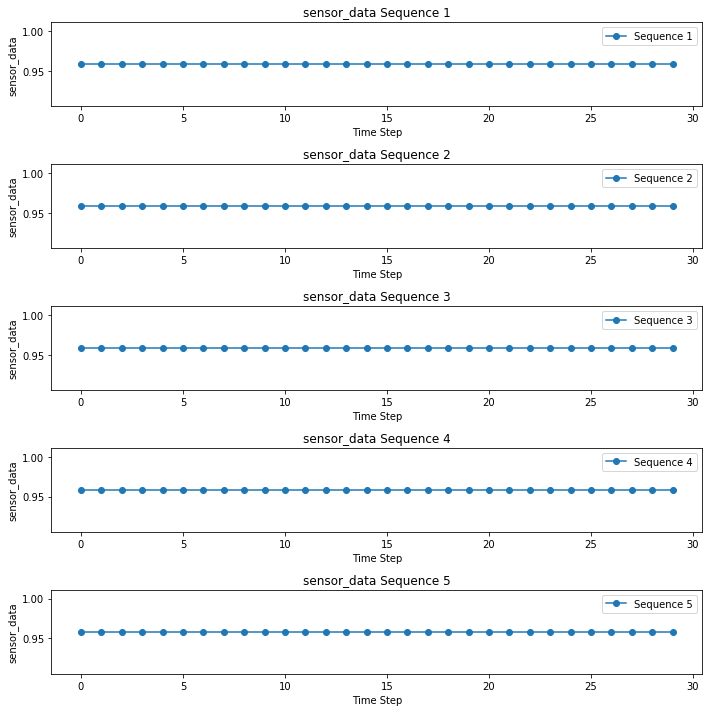

In [20]:
import matplotlib.pyplot as plt

# Plotting parameters
num_plots = 5  # Number of sequences to plot
plot_length = sequence_length  # Length of each sequence to plot

# Plot the speed sequences
plt.figure(figsize=(10, 10))
for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(sensor_data[i][:plot_length], marker='o', label=f'Sequence {i+1}')
    plt.xlabel('Time Step')
    plt.ylabel('sensor_data')
    plt.title(f'sensor_data Sequence {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()

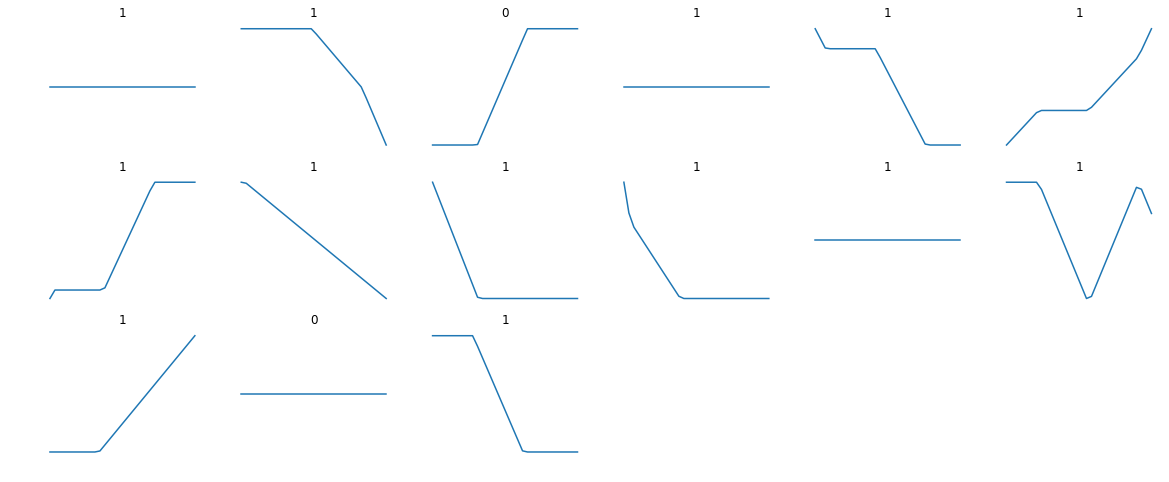

In [21]:
speed_samples = 15
idxes = np.random.randint(0, sensor_data.shape[0], speed_samples)
plt.figure(figsize=(20, 8))
# show sin wave
for i in range(speed_samples):
    plt.subplot(3, speed_samples // 3+1, i + 1)
    plt.plot(sensor_data[idxes[i]].squeeze())
    #plt.ylim(-0.8, 0.8)
    plt.title(sensor_labels[idxes[i]])
    plt.axis('off')

In [22]:
def sin_plot(sin_sample, c_sample):
    plt.figure(figsize=(8, 1.5))
    for i in range(sin_sample.shape[0]):
        plt.subplot(1, 8, i + 1)
        plt.axis('off')
        plt.plot(sin_sample[i])
        plt.title(c_sample[i])
        plt.ylim(-1.0, 1.0)
    plt.show()

In [23]:
def DPSGD(sigma, l2norm_bound, learning_rate, total_examples):
    import tensorflow as tf
    from differential_privacy.dp_sgd.dp_optimizer import dp_optimizer
    from differential_privacy.dp_sgd.dp_optimizer import sanitizer
    from differential_privacy.privacy_accountant.tf import accountant

    eps = tf.placeholder(tf.float32)
    delta = tf.placeholder(tf.float32)

    priv_accountant = accountant.GaussianMomentsAccountant(total_examples)
    clip = True
    batches_per_lot = 1

    gaussian_sanitizer = sanitizer.AmortizedGaussianSanitizer(
                    priv_accountant,
                    [l2norm_bound, clip])

    return dp_optimizer.DPGradientDescentOptimizer(learning_rate,
                                                  [eps, delta],
                                                  sanitizer=gaussian_sanitizer,
                                                  sigma=sigma,
                                                  batches_per_lot=batches_per_lot)

In [24]:
#from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, CuDNNLSTM
from keras.layers import concatenate, Flatten, Embedding, RepeatVector
from keras.layers.recurrent import LSTM
from keras.models import Sequential, Model
from keras.optimizers import RMSprop, Adam, SGD
from keras.layers.wrappers import TimeDistributed
from keras import backend as K

Using TensorFlow backend.


In [25]:
sigma = 1e-1#1e-01
l2norm_bound = 1e-1#1e-01
learning_rate = 0.1
total_examples = X_train.shape[0]

D_OPTIMIZER = DPSGD(sigma, l2norm_bound, learning_rate, total_examples)
# D_OPTIMIZER = SGD(0.1)
G_OPTIMIZER = Adam()

class RCGAN():
    def __init__(self,
                 input_dim,
                 seq_length,
                 latent_dim,
                 hidden_dim,
                 embed_dim,
                 batch_size,
                 num_classes,
                 summary=False,
                 save_image=False,
                 save_model=False,
                 make_data=False):

        self.input_dim = input_dim
        self.seq_length = seq_length
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        self.embed_dim = embed_dim
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.save_image = save_image
        self.save_model = save_model
        self.make_data = make_data

        # model instantiation
        self.discriminator = self.build_discriminator()
        self.generator = self.build_generator()
        
        # define input tenor shape
        # we define batch size here for DP-SGD
        x = Input(batch_shape=(self.batch_size, self.seq_length, self.input_dim))
        z = Input(batch_shape=(self.batch_size, self.seq_length, self.latent_dim))
        c = Input(batch_shape=(self.batch_size, 1), dtype='int32')
        
        self.set_trainable(self.generator, trainable=False)
        
        # discriminator takes real x and gererated gx
        d_logit_real = self.discriminator([x, c])
        gx = self.generator([z, c])
        d_logit_fake = self.discriminator([gx, c])
        
        # get loss function
        d_loss, g_loss = self.gan_loss(d_logit_real, d_logit_fake)
        
        # build traiable discriminator model
        self.D_model = Model([x, z, c], [d_logit_real, d_logit_fake])
        self.D_model.add_loss(d_loss)
        self.D_model.compile(optimizer=D_OPTIMIZER, loss=None)
        
        # freeze discriminator parameter when training discriminator
        self.set_trainable(self.generator, trainable=True)
        self.set_trainable(self.discriminator, trainable=False)
        
        # build traiable generator model
        self.G_model = Model([z, c], d_logit_fake)
        self.G_model.add_loss(g_loss)
        self.G_model.compile(optimizer=G_OPTIMIZER, loss=None)
        
    def gan_loss(self, d_logit_real, d_logit_fake):
        """
        define loss function
        """
        
        d_loss_real = K.mean(K.binary_crossentropy(output=d_logit_real, 
                                                   target=K.ones_like(d_logit_real), 
                                                   from_logits=True))
        d_loss_fake = K.mean(K.binary_crossentropy(output=d_logit_fake, 
                                                   target=K.zeros_like(d_logit_fake), 
                                                   from_logits=True))
        
        d_loss = d_loss_real + d_loss_fake
        
        g_loss = K.mean(K.binary_crossentropy(output=d_logit_fake, 
                                              target=K.ones_like(d_logit_fake), 
                                              from_logits=True))
        
        return d_loss, g_loss
        

    def build_generator(self):

        # define sequential model
        model = Sequential()

        model.add(LSTM(units=self.hidden_dim, 
                       return_sequences=True)) # , 
        #model.add(LSTM(units=self.hidden_dim, return_sequences=True))
        #model.add(LSTM(units=self.hidden_dim, return_sequences=True))
        model.add(TimeDistributed(Dense(self.input_dim, activation='tanh')))

        # define tensor variable
        z = Input(batch_shape=(self.batch_size, self.seq_length, self.latent_dim))
        c = Input(batch_shape=(self.batch_size, 1), dtype='int32')
        c_emb = Flatten()(Embedding(self.num_classes, self.embed_dim)(c))
        c_emb = RepeatVector(self.seq_length)(c_emb)
#         inputs = multiply([z, c_emb])
        inputs = concatenate([z, c_emb], axis=-1)

        # define generator output
        gx = model(inputs)

        return Model([z, c], gx)

    def build_discriminator(self):

        # define sequential model
        model = Sequential()

        model.add(LSTM(units=self.hidden_dim, 
                       return_sequences=True)) # , input_shape=(self.seq_length, self.input_dim)
        #model.add(LSTM(units=self.hidden_dim, return_sequences=True))
        #model.add(LSTM(units=self.hidden_dim, return_sequences=True))
#         model.add(TimeDistributed(Dense(1, activation='sigmoid')))  pass logit value to loss function
        model.add(TimeDistributed(Dense(1)))

        # define tenor variable 
        x = Input(batch_shape=(self.batch_size, self.seq_length, 1))
        c = Input(batch_shape=(self.batch_size, 1), dtype='int32')
        c_emb = Flatten()(Embedding(self.num_classes, self.embed_dim)(c))
        c_emb = RepeatVector(self.seq_length)(c_emb)
        
        #inputs = multiply([x, c_emb])
        inputs = concatenate([x, c_emb], axis=-1)
    
        # define discriminator output
        validity = model(inputs)

        return Model([x, c], validity)

    def set_trainable(self, model, trainable=False):
        model.trainable = trainable
        for layer in model.layers:
            layer.trainable = trainable
        
    def data_shuffle(self, x, y):
        # shuffle x and y 
        rnd = np.random.randint(999)
        for l in [x, y]:
            np.random.seed(rnd)
            np.random.shuffle(l)
            
    def compute_MMD(ori_data, generated_data, sample_size = 100):
 
      # np.random.seed(1)

      idx = np.random.permutation(len(ori_data))[:sample_size]
      real_sample = np.asarray(ori_data)[idx]
      synthetic_sample = np.asarray(generated_data)[idx]

      real_sample = torch.tensor(real_sample)
      synthetic_sample = torch.tensor(synthetic_sample)

      real_sample = real_sample.view(real_sample.shape[0], real_sample.shape[1] * real_sample.shape[2])
      synthetic_sample = synthetic_sample.view(synthetic_sample.shape[0], synthetic_sample.shape[1] * synthetic_sample.shape[2])

      xx, yy, zz = torch.mm(real_sample,real_sample.t()), torch.mm(synthetic_sample,synthetic_sample.t()), torch.mm(real_sample,synthetic_sample.t())

      rx = (xx.diag().unsqueeze(0).expand_as(xx))
      ry = (yy.diag().unsqueeze(0).expand_as(yy))

      K = torch.exp(- 0.2 * (rx.t() + rx - 2*xx))
      L = torch.exp(- 0.2 * (ry.t() + ry - 2*yy))
      P = torch.exp(- 0.2 * (rx.t() + ry - 2*zz))

      beta = (1./(sample_size*(sample_size-1)))
      gamma = (2./(sample_size*sample_size))
 
      return beta * (torch.sum(K)+torch.sum(L)) - gamma * torch.sum(P)

    def train(self, n_epochs, X_train, y_train):
        MMD = []
        
        for epoch in range(n_epochs):

            self.data_shuffle(X_train, y_train)

            for i in range(int(X_train.shape[0] / self.batch_size)):
                
                tr_x = X_train[i * self.batch_size: (i + 1) * self.batch_size]
                tr_y = y_train[i * self.batch_size: (i + 1) * self.batch_size]

                noise = np.random.normal(0, 1, (
                    self.batch_size, self.seq_length, self.latent_dim))

                d_loss_curr = self.D_model.train_on_batch([tr_x, noise, tr_y], None)
                g_loss_curr = self.G_model.train_on_batch([noise, tr_y], None)
                
                # Plot gererated samples from cureent generator
                gen_data = []                
                for j in range(10):
                    noise = np.random.normal(0, 1, (
                        self.batch_size, self.seq_length, self.latent_dim))
                    sample_c = np.zeros((self.batch_size,))
                    sample_gx = self.generator.predict([noise, sample_c])
                    gen_data.append(sample_gx)
                    
                gen_data = np.array(gen_data)
                np.reshape(gen_data, (150, 30, 1))
                MMD.append(compute_MMD(X_train, gen_data, sample_size = 100))
                
            
            if (epoch + 1)% 5 == 0:
                # Plot the progress
                print ("epoch {} [D loss: {:.3f}] [G loss: {:.3f}]".format(epoch + 1,
                                                                           np.mean(d_loss_curr),
                                                                           np.mean(g_loss_curr)))
                # Plot gererated samples from cureent generator
                noise = np.random.normal(0, 1, (
                    self.batch_size, self.seq_length, self.latent_dim))
                sample_c = np.random.randint(0, self.num_classes, self.batch_size)
                sample_gx = self.generator.predict([noise, sample_c])
                sin_plot(sample_gx[:8], sample_c[:8])
            return MMD

In [26]:
print(X_train.shape[2])
print(X_train.shape[1])

1
30


In [27]:
# hyper parameter for training
input_dim = X_train.shape[2]
seq_length = X_train.shape[1]
latent_dim = 50
hidden_dim = 100
embed_dim = 10
batch_size = 15
n_epochs = 25
num_classes = 2#len(np.unique(y_train))

rcgan = RCGAN(input_dim,
              seq_length,
              latent_dim,
              hidden_dim,
              embed_dim,
              batch_size,
              num_classes)

In [ ]:
MMD = []
MMD = rcgan.train(n_epochs, X_train, y_train)

In [ ]:
from keras.models import Model
# Save the generator and discriminator models
rcgan.generator.save('rawcan_multisensor_RCGAN_generator_model.h5')
rcgan.discriminator.save('rawcan_discriminator_model.h5')

print("Models saved successfully.")

In [28]:
from keras.models import load_model

loaded_model = load_model("rawcan_multisensor_RCGAN_generator_model.h5")
print("Models loaded successfully.")

Models loaded successfully.


C:\Users\qazim\AppData\Roaming\Python\Python36\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [29]:
# Set the seed for reproducibility
np.random.seed(50)

# Define the total number of samples you want to generate
total_num_samples = 1000 #1000  # Change this to your desired number of samples

# Calculate the number of batches needed
num_batches = total_num_samples // batch_size + (total_num_samples % batch_size > 0)

# Initialize an empty list to collect generated samples
all_generated_samples1 = []

for _ in range(num_batches):
    # Generate random noise and conditional labels
    noise = np.random.normal(0, 1, (batch_size, seq_length, latent_dim))
    #sample_c = np.sort(np.random.randint(0, num_classes, batch_size))
    
    # Define the desired class for which you want to generate data
    desired_class = 0  # Generate data for sensor 1

    # Create conditional labels for the desired class
    sample_c = np.full(batch_size, desired_class)

    # Generate synthetic data using the loaded generator model
    sample_gx1 = loaded_model.predict([noise, sample_c])

    # Collect the generated samples
    all_generated_samples1.append(sample_gx1)

# Concatenate all the generated samples
all_generated_samples1 = np.concatenate(all_generated_samples1, axis=0)

In [30]:
print("Generated samples shape:", all_generated_samples1.shape)

Generated samples shape: (1005, 30, 1)


In [31]:
# Renormalization
generated_data1 = all_generated_samples1 * max_val1
sample_gx1 = generated_data1 + min_val1

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def low_pass_filter(data, cutoff_freq, sampling_rate):
    # Normalize the cutoff frequency
    nyquist_freq = 0.5 * sampling_rate
    normalized_cutoff_freq = cutoff_freq / nyquist_freq

    # Design a low-pass Butterworth filter
    b, a = butter(N=4, Wn=normalized_cutoff_freq, btype='low')

    # Apply the filter to the data
    filtered_data = filtfilt(b, a, data)

    return filtered_data

In [33]:
def moving_average(data, window_size):
    # Compute the moving average
    moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    return moving_avg

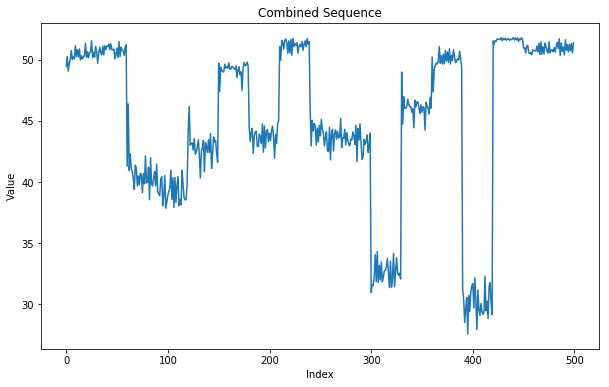

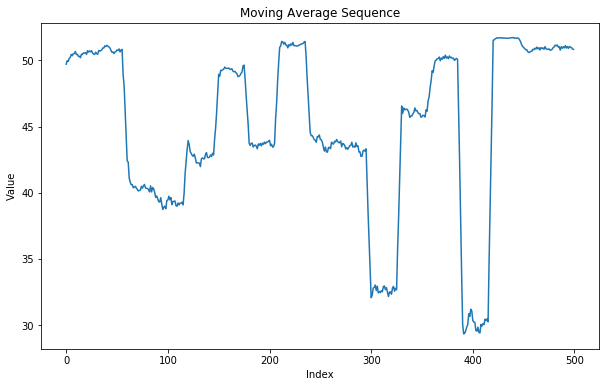

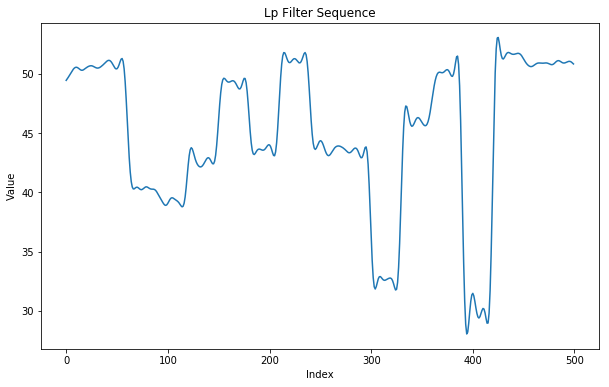

In [34]:
import matplotlib.pyplot as plt
# Flatten the sample_gx array
flattened_sample_gx1 = sample_gx1.flatten()

# Create an array of indices
indices1 = np.arange(len(flattened_sample_gx1[:500]))
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Plot the flattened sample_gx array against the indices
plt.plot(indices1, flattened_sample_gx1[:500])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Combined Sequence')
plt.show()

#---------------------moving average window-----------------------
# Define the number of points to use in the moving average window
window_size = 5
# Compute the moving average using the function
moving_avg1 = moving_average(flattened_sample_gx1, window_size)
# Create an array of indices
indices1 = np.arange(len(moving_avg1[:500]))
indices1_all = np.arange(len(moving_avg1))

plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Plot the flattened sample_gx array against the indices
plt.plot(indices1, moving_avg1[:500])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Moving Average Sequence')
plt.show()

#------------------Low Pass Filter--------------------------------
# Filter the data using the low_pass_filter function
filtered_data1 = low_pass_filter(flattened_sample_gx1, cutoff_freq=5, sampling_rate=50)

# Create an array of indices
indices1 = np.arange(len(filtered_data1[:500]))
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Plot the flattened sample_gx array against the indices
plt.plot(indices1, filtered_data1[:500])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Lp Filter Sequence')
plt.show()

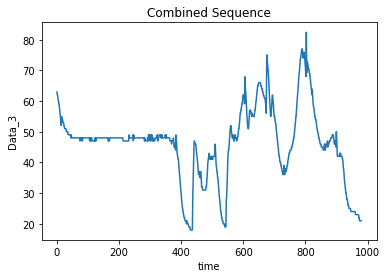

In [35]:
import matplotlib.pyplot as plt


# Plot the flattened sample_gx array against the indices
plt.plot(new_time_can_data_sensor2, interpolated_can_data_sensor2)
plt.xlabel('time')
plt.ylabel('Data_3')
plt.title('Combined Sequence')
plt.show()

In [36]:
# Set the seed for reproducibility
np.random.seed(50)

# Define the total number of samples you want to generate
total_num_samples = 1000 #1000  # Change this to your desired number of samples

# Calculate the number of batches needed
num_batches = total_num_samples // batch_size + (total_num_samples % batch_size > 0)

# Initialize an empty list to collect generated samples
all_generated_samples2 = []

for _ in range(num_batches):
    # Generate random noise and conditional labels
    noise = np.random.normal(0, 1, (batch_size, seq_length, latent_dim))
    #sample_c = np.sort(np.random.randint(0, num_classes, batch_size))
    
    # Define the desired class for which you want to generate data
    desired_class = 1  # Generate data for sensor 1

    # Create conditional labels for the desired class
    sample_c = np.full(batch_size, desired_class)

    # Generate synthetic data using the loaded generator model
    sample_gx2 = loaded_model.predict([noise, sample_c])

    # Collect the generated samples
    all_generated_samples2.append(sample_gx2)

# Concatenate all the generated samples
all_generated_samples2 = np.concatenate(all_generated_samples2, axis=0)

# Renormalization
generated_data2 = all_generated_samples2 * max_val1
sample_gx2 = generated_data2 + min_val1

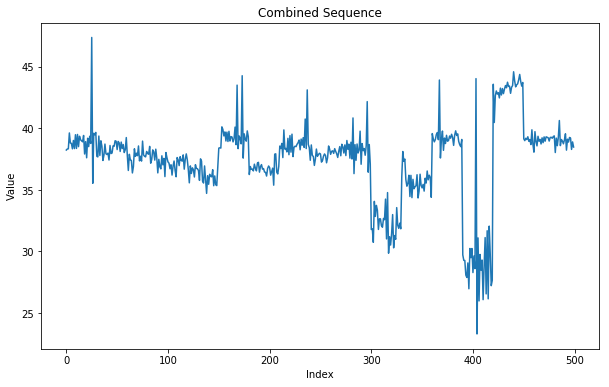

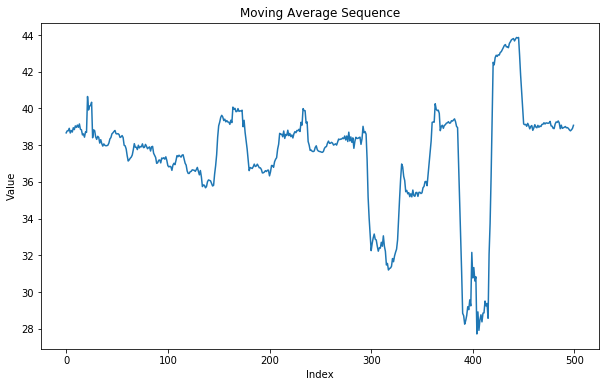

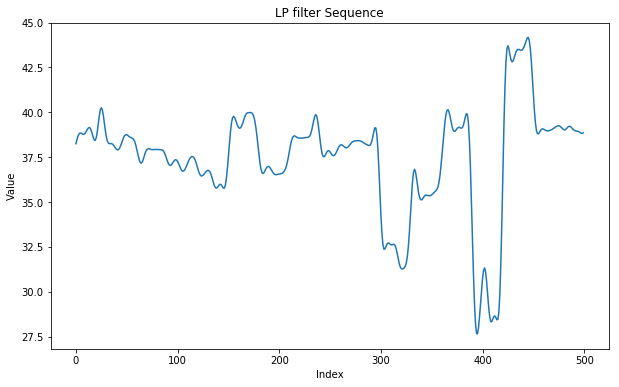

In [37]:
import matplotlib.pyplot as plt
# Flatten the sample_gx array
flattened_sample_gx2 = sample_gx2.flatten()

# Create an array of indices
indices2 = np.arange(len(flattened_sample_gx2[:500]))
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Plot the flattened sample_gx array against the indices
plt.plot(indices2, flattened_sample_gx2[:500])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Combined Sequence')
plt.show()

#---------------------moving average window-----------------------
# Define the number of points to use in the moving average window
window_size = 5
# Compute the moving average using the function
moving_avg2 = moving_average(flattened_sample_gx2, window_size)
# Create an array of indices
indices2 = np.arange(len(moving_avg2[:500]))
indices2_all = np.arange(len(moving_avg2))

plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Plot the flattened sample_gx array against the indices
plt.plot(indices2, moving_avg2[:500])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Moving Average Sequence')
plt.show()

#------------------Low Pass Filter--------------------------------
# Filter the data using the low_pass_filter function
filtered_data2 = low_pass_filter(flattened_sample_gx2, cutoff_freq=5, sampling_rate=50)

# Create an array of indices
indices2 = np.arange(len(filtered_data2[:500]))
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Plot the flattened sample_gx array against the indices
plt.plot(indices2, filtered_data2[:500])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('LP filter Sequence')
plt.show()

In [38]:
import csv

# Define your arrays and their corresponding column names
arrays = [
    (new_time_can_data_sensor1, 'Timestamp1'),
    (interpolated_can_data_sensor1, 'sensor1'),
    (new_time_can_data_sensor2, 'Timestamp2'),
    (interpolated_can_data_sensor2, 'sensor2'),
    (indices1_all, 'Timestamp1_gan'), 
    (moving_avg1, 'sensor1_gan'),
    (indices2_all, 'Timestamp2_gan'),
    (moving_avg2, 'sensor2_gan')     
    
]

# Determine the maximum length among arrays
max_length = max(len(arr) for arr, _ in arrays)

In [40]:
print(max_length)
print(len(new_time_can_data_sensor1))
print(len(interpolated_can_data_sensor1))
print(len(new_time_can_data_sensor2))
print(len(interpolated_can_data_sensor2))
print(len(indices1_all))
print(len(moving_avg1))
print(len(indices2_all))
print(len(moving_avg2))

30146
4900
4900
9810
9810
30146
30146
30146
30146


In [41]:
import csv

# Define your arrays and their corresponding column names
arrays = [
    (new_time_can_data_sensor2, 'Timestamp2'),
    (interpolated_can_data_sensor2, 'sensor2')    
    
]

# Determine the maximum length among arrays
max_length = max(len(arr) for arr, _ in arrays)

# Open a CSV file in write mode
with open('sensor2_data_complete.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write column names as header
    header = [name for _, name in arrays]
    csvwriter.writerow(header)

    # Write arrays to CSV file column by column
    for i in range(max_length):
        row = []
        for arr, _ in arrays:
            if i < len(arr):
                row.append(arr[i])
            else:
                break  # Stop writing if the array is shorter
        csvwriter.writerow(row)

In [43]:
import csv

# Define your arrays and their corresponding column names
arrays = [
    (new_time_can_data_sensor1, 'Timestamp1'),
    (interpolated_can_data_sensor1, 'sensor1'),
    (new_time_can_data_sensor2, 'Timestamp2'),
    (interpolated_can_data_sensor2, 'sensor2'),
    (indices1_all, 'Timestamp1_gan'), 
    (moving_avg1, 'sensor1_gan'),
    (indices2_all, 'Timestamp2_gan'),
    (moving_avg2, 'sensor2_gan')     
    
]

# Determine the maximum length among arrays
max_length = max(len(arr) for arr, _ in arrays)

# Open a CSV file in write mode
with open('sensor_data_complete.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write column names as header
    header = [name for _, name in arrays]
    csvwriter.writerow(header)

    # Write arrays to CSV file column by column
    for i in range(max_length):
        row = []
        for arr, _ in arrays:
            if i < len(arr):
                row.append(arr[i])
            else:
                break  # Stop writing if the array is shorter
        csvwriter.writerow(row)

In [ ]:
'''
# Create a DataFrame with the subset data
df_subset_gan = pd.DataFrame({
    
    'Timestamp1_gan': indices1, 
    'sensor1_gan': moving_avg1[:500],
    
    'Timestamp2_gan': indices2,
    'sensor2_gan': moving_avg2[:500]
    
})

# Save the subset data to a CSV file
df_subset_gan.to_csv('sensor_data_gan.csv', index=False)
'''

In [ ]:
import matplotlib.pyplot as plt
import can
import cantools
import time


# Initialize an empty list to store decoded data
decoded_data = []

# Load the DBC file
db = cantools.database.load_file('C:\\Users\\qazim\\OneDrive - The Ohio State University\\Application for Fellowship\\.Project\\SDCS\\J1939 Standards\\j1939.dbc')
message_name = 'CCVS'  # Replace with the actual message name from your DBC file
message_id = 2566844926  # Replace with the actual message ID from your DBC file

# Receive and decode CAN message
    #received_message = can_bus.recv()
    #if received_message:
    # Loop over CAN_ID and CAN_Data pairs
# Loop over rows of CAN_ID, CAN_Timestamp, and CAN_Data
for row in zip(CAN_ID, CAN_Timestamp, CAN_Data.itertuples(index=False)):
    can_id, timestamp, data = row
    
    # Extract the bytes from the Pandas DataFrame row
    payload_bytes = bytes(data)
    # Encode the string CAN_Data into bytes
    #encoded_CAN_Data = bytes(data_vals)#bytes.fromhex(data_val)
    # Decode the message using db.decode_message
    decoded_info = db.decode_message(can_id, payload_bytes)
    
    # Save the decoded information in the list
    decoded_data.append(decoded_info)
#decoded_data = db.decode_message(CAN_ID, CAN_Data)
# Save the decoded data to an array if needed
#decoded_array.append(decoded_data)

In [ ]:
# Print the result for the specific row
print(decoded_data[0])

In [ ]:
print(len(decoded_data))

In [ ]:
# Extract and store 'WheelBasedVehicleSpeed' from each decoded message
vehicle_speed = [message.get('WheelBasedVehicleSpeed', None) for message in decoded_data]

# Print the extracted wheel based vehicle speeds
#print("Wheel Based Vehicle Speeds:", vehicle_speed)

In [ ]:
# Assuming CAN_Data is your DataFrame
CAN_Timestamp = CAN_Timestamp.tolist()

In [ ]:
# Plot the vehicle speed
plt.plot(CAN_Timestamp, vehicle_speed, label='Vehicle Speed')
plt.xlabel('Time')
plt.ylabel('Wheel Based Vehicle Speed')
plt.title('Wheel Based Vehicle Speed Over Time')
plt.legend()
plt.show()

In [ ]:
# Extract and store 'ClutchSwitch' from each decoded message
Clutch_pos = [message.get('ClutchSwitch', None) for message in decoded_data]
#print(Clutch_pos[::10])

In [ ]:
# Mapping of states
state_mapping = {
    "NotAvailable": 3,
    "Error": 2,
    "ClutchPedalDepressed": 1,
    "ClutchPedalReleased": 0
}

# Map the Clutch Position values to numeric mapping
Clutch_num = [state_mapping[str(state)] for state in Clutch_pos]

In [ ]:
# Plot the vehicle speed
plt.plot(CAN_Timestamp, Clutch_num, label='Clutch Switch Position')
plt.xlabel('Time')
plt.ylabel('"ClutchPedalDepressed": 1,"ClutchPedalReleased": 0')
plt.title('Clutch Switch Position Over Time')
plt.legend()
plt.show()

In [ ]:
## Convert vehicle speeds to bytes and then to hex and float
#speed_bytes = [struct.pack('!f', speed) for speed in vehicle_speed]
#hex_vehicle_speed = [speed.hex()[2:] for speed in speed_bytes]

In [ ]:
# Convert vehicle speeds to hexadecimal
hex_vehicle_speed = [hex(int(speed))[2:] for speed in vehicle_speed]

In [ ]:
# Pad each hex value with leading zeros
hex_vehicle_speed = [value.zfill(2) for value in hex_vehicle_speed]
print(hex_vehicle_speed)

In [ ]:
# Convert vehicle speeds from hexadecimal to float to check the resolution loss
float_vehicle_speed = [float.fromhex(s) for s in hex_vehicle_speed]

In [ ]:
# Plot the vehicle speed
plt.plot(CAN_Timestamp, float_vehicle_speed, label='Vehicle Speed')
plt.xlabel('Time')
plt.ylabel('Wheel Based Vehicle Speed')
plt.title('Wheel Based Vehicle Speed Over Time')
plt.legend()
plt.show()

In [ ]:
# Converting to  Images for GAN
from PIL import Image

In [ ]:
def hex_to_one_hot(hex_digit):
    hex_digits = '0123456789abcdef'

    # Create a 16-element vector
    one_hot_vector = [0] * 16
    
    # Find the index of the given hexadecimal digit and set the corresponding element to 255
    value = hex_digits.index(hex_digit)
    one_hot_vector[value] = 255

    return one_hot_vector

In [ ]:
# Convert each hex value to one-hot vectors - each hex digit gets a separate row
one_hot_matrix = []

for hex_value in hex_vehicle_speed:
    one_hot_row = []
    for hex_digit in hex_value:
        one_hot_row.append(hex_to_one_hot(hex_digit))
        #one_hot_row.extend(hex_to_one_hot(hex_digit))
    one_hot_matrix.append(one_hot_row)

In [ ]:
# Print the resulting one-hot matrix
for hex_value, one_hot_row in zip(hex_vehicle_speed[:20], one_hot_matrix[:20]):
    print(f"Hex Value: {hex_value}, One-Hot Matrix Row: {one_hot_row}")